<a href="https://colab.research.google.com/github/chaeyoooo/capstondesign_voicefishing/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=78d941f12f42a66c2ad9ae2051112e0bf3351ffc3047b53c9667c76150021e90
  Stored in directory: /root/.cache/pip/wheels/81/f2/e0/d578821d723b473d18610ea93810e4a5402463919f07e603d9
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer
import pandas as pd

# 데이터 로드
phishing = pd.read_csv("/content/drive/MyDrive/merged_phishing.csv")
normal = pd.read_csv("/content/drive/MyDrive/merged_normal_with_emotion_fixed.csv")

# 라벨링
phishing['label'] = 1
normal['label'] = 0

# 데이터 결합
df = pd.concat([phishing, normal], ignore_index=True)

print(f"데이터 로드 완료 → shape: {df.shape}")

# sentence-BERT 모델 로드
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# 임베딩 추출
embeddings = model.encode(df['transcribed_text'].tolist(), show_progress_bar=True)

# 임베딩 → DataFrame
df_embed = pd.DataFrame(embeddings)
print(f"임베딩 완료 → shape: {df_embed.shape}")

# 라벨 추가
df_embed['label'] = df['label'].values


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

✅ 임베딩 완료 → shape: (590, 384)


In [ ]:
from sklearn.model_selection import train_test_split

X = df_embed.drop(columns=['label'])
y = df_embed['label']

# train / temp split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# valid / test split
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"✅ Train: {X_train.shape}, Valid: {X_valid.shape}, Test: {X_test.shape}")


✅ Train: (354, 384), Valid: (118, 384), Test: (118, 384)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 검증
y_valid_pred = xgb_model.predict(X_valid)

print("✅ Validation Accuracy:", accuracy_score(y_valid, y_valid_pred))
print("✅ Validation Classification Report:\n", classification_report(y_valid, y_valid_pred))


✅ Validation Accuracy: 0.8135593220338984
✅ Validation Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.58      0.66        36
           1       0.83      0.91      0.87        82

    accuracy                           0.81       118
   macro avg       0.79      0.75      0.76       118
weighted avg       0.81      0.81      0.81       118



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid,
                    scoring='accuracy', cv=3, verbose=2, n_jobs=-1)

grid.fit(X_train, y_train)

print("✅ Best Params:", grid.best_params_)
print("✅ Best CV Score:", grid.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
✅ Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
✅ Best CV Score: 0.8785310734463275


In [ ]:
best_model = XGBClassifier(**grid.best_params_, random_state=42)
best_model.fit(X_train, y_train)

y_valid_pred = best_model.predict(X_valid)
print("✅ Validation Accuracy (최적 모델):", accuracy_score(y_valid, y_valid_pred))
print("✅ Validation Classification Report:\n", classification_report(y_valid, y_valid_pred))


✅ Validation Accuracy (최적 모델): 0.8728813559322034
✅ Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78        36
           1       0.89      0.94      0.91        82

    accuracy                           0.87       118
   macro avg       0.86      0.83      0.84       118
weighted avg       0.87      0.87      0.87       118



<Figure size 800x500 with 0 Axes>

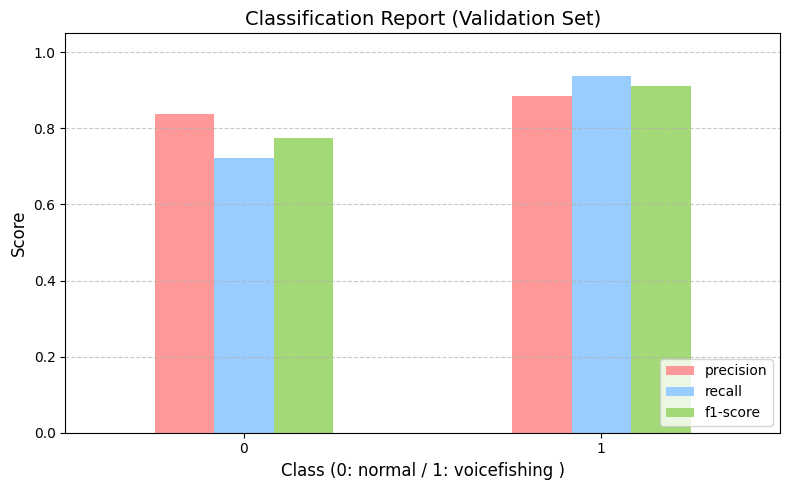

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# 예측값, 실제값으로부터 classification report 생성
report = classification_report(y_valid, y_valid_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# 클래스(0, 1)에 해당하는 precision, recall, f1-score만 시각화
class_scores = report_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']]

# 시각화
plt.figure(figsize=(8, 5))
class_scores.plot(kind='bar', figsize=(8, 5), color=['#FF9999', '#99CCFF', '#A3D977'])

plt.title("Classification Report (Validation Set)", fontsize=14)
plt.xlabel("Class (0: normal / 1: voicefishing )", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


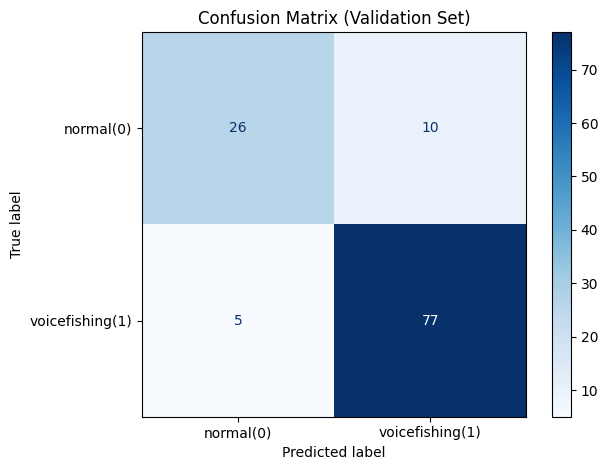

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 혼동 행렬 계산
cm = confusion_matrix(y_valid, y_valid_pred, labels=[0, 1])

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal(0)", "voicefishing(1)"])
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix (Validation Set)")
plt.grid(False)
plt.tight_layout()
plt.show()


<ipython-input-13-190ea6b2af07>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="emotion", y="keyword_count", data=grouped, palette="Set2", edgecolor="black")


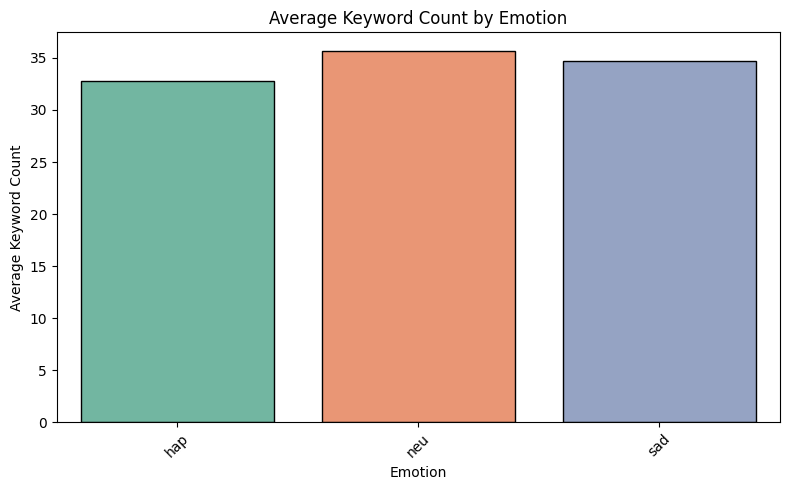

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기 (본인 경로로 수정)
df = pd.read_csv("/content/drive/MyDrive/merged_phishing.csv")

# 감정별 평균 키워드 수 계산
grouped = df.groupby("emotion")["keyword_count"].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x="emotion", y="keyword_count", data=grouped, palette="Set2", edgecolor="black")
plt.title("Average Keyword Count by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Average Keyword Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
y_test_pred = best_model.predict(X_test)
print(" Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


✅ Test Accuracy: 0.8050847457627118
✅ Test Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67        37
           1       0.84      0.89      0.86        81

    accuracy                           0.81       118
   macro avg       0.78      0.76      0.76       118
weighted avg       0.80      0.81      0.80       118

